In [9]:
import numpy as np
from sklearn.manifold import TSNE
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import os

from data_processing import read_data, data_to_pandas_df, save_csv_data

In [10]:
os.chdir("C:\Desenvolvimento\Apollo Solutions Dev - ML Assignment2")

In [11]:
data_path = "data/raw/mini_gm_public_v0.1.p"

data = read_data(data_path)

df = data_to_pandas_df(data)

save_csv_data(df)

In [12]:
#Checking for null values
print('\n', "CHECKING MISSING VALUES", '\n')
print(df.isnull().sum(), '\n \n')

print('\n', "CHECKING COLUMNS TYPES", '\n')
print(df.dtypes)


 CHECKING MISSING VALUES 

syndrome_id    0
subject_id     0
image_id       0
embedding      0
dtype: int64 
 


 CHECKING COLUMNS TYPES 

syndrome_id    object
subject_id     object
image_id       object
embedding      object
dtype: object


<Axes: title={'center': 'Number of images per syndrome'}, xlabel='syndrome_id', ylabel='count'>

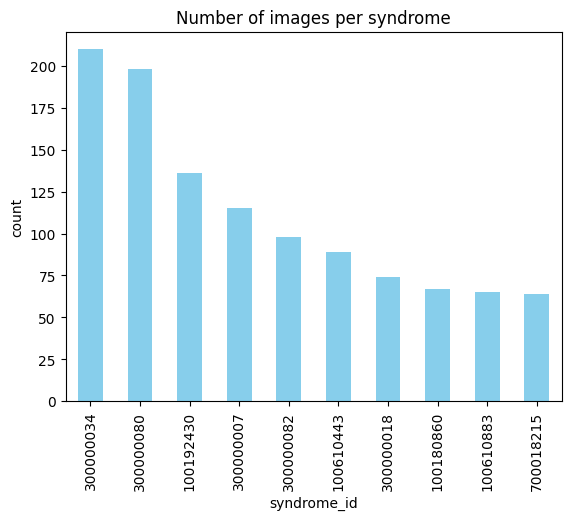

In [13]:
#Plotting the number of images per syndrome
df['syndrome_id'].value_counts().plot(kind='bar', 
                                      color='skyblue', 
                                      xlabel='syndrome_id', ylabel='count', 
                                      title='Number of images per syndrome', 
                                    )

In [14]:
#Top 10 subjects with most images per syndrome
for syn_id in df['syndrome_id'].unique():
    print('\n', f"NUMBER OF UNIQUE SUBJECTS - SYNDROME {syn_id}: ", len(df[df['syndrome_id'] == syn_id]['subject_id'].unique()), "\n")
    print(f"TOP 10 SUBJECTS WITH MOST IMAGES - SYNDROME {syn_id}")
    print(df[df['syndrome_id'] == syn_id]['subject_id'].value_counts().head(10))



 NUMBER OF UNIQUE SUBJECTS - SYNDROME 300000082:  83 

TOP 10 SUBJECTS WITH MOST IMAGES - SYNDROME 300000082
subject_id
739878    7
735203    3
735915    2
754643    2
738908    2
738905    2
738903    2
739596    2
739874    2
739643    1
Name: count, dtype: int64

 NUMBER OF UNIQUE SUBJECTS - SYNDROME 300000080:  180 

TOP 10 SUBJECTS WITH MOST IMAGES - SYNDROME 300000080
subject_id
728457    5
728456    4
728458    4
738723    2
34234     2
34238     2
613       2
728222    2
729122    2
34268     2
Name: count, dtype: int64

 NUMBER OF UNIQUE SUBJECTS - SYNDROME 700018215:  60 

TOP 10 SUBJECTS WITH MOST IMAGES - SYNDROME 700018215
subject_id
738735    2
734002    2
734480    2
2372      2
734478    1
738738    1
738736    1
738739    1
738737    1
738734    1
Name: count, dtype: int64

 NUMBER OF UNIQUE SUBJECTS - SYNDROME 100610883:  59 

TOP 10 SUBJECTS WITH MOST IMAGES - SYNDROME 100610883
subject_id
8770    3
8779    2
8778    2
8772    2
8775    2
8861    1
8860    1
8862   

### Data Visualization

Using TSNE to reduce the dimensionality of the embeddings to 2d.

In [15]:
df_tsne = df.copy()

#t-SNE visualization
embeddings = df_tsne['embedding'].tolist()

#Trying to convert strings to floats
try:
    embeddings = [list(map(float, embedding.item().split())) for embedding in embeddings]
except ValueError as e:
    print(f"Error during conversion: {e}")
    #print(f"Problematic embedding: {embedding}") 

#Convert embeddings to NumPy array
embeddings = np.array(embeddings)

#t-SNE
tsne = TSNE(n_components=2, random_state=42)
df_tsne[['TSNE Dim1', 'TSNE Dim2']] = tsne.fit_transform(embeddings)

#plotting
fig_2d = px.scatter(df_tsne, x='TSNE Dim1', y='TSNE Dim2', color='syndrome_id',
                    labels={'x': 'Dimension 1', 'y': 'Dimension 2'},
                    title='t-SNE 2D projection of embeddings')
fig_2d.show()

Error during conversion: can only convert an array of size 1 to a Python scalar


## **PT**
### OBSERVAÇÕES: 

- *Clusters bem definidos*: Existem grupos de pontos claramente separados no espaço 2D.
- *Sobreposição*: Alguns clusters se sobrepõem, indicando que a separação entre algumas classes não é tão clara e pode haver alguma dificuldade na classificação desses pontos.
- *Otliers*: Há alguns pontos que se encontram distantes dos clusters principais, podendo representar casos atípicos ou ruído nos dados.

### Relação com a Tarefa de Classificação:
A visualização sugere que a classificação dos embeddings em seus respectivos syndrome_id pode ser uma tarefa relativamente fácil para os clusters [300000007, 100610443, 300000034, 100610883] pois estão separados de uma maneira mais clara no gráfico acima, mas mais desafiadora para os outros devido à sobreposição. A presença de outliers também pode impactar o desempenho dos modelos de classificação.




## **EN**
### COMMENTS: 

- *Well-defined clusters*: There are clearly separated groups of points in 2D space.
- *Overlap*: Some clusters overlap, reducing the fact that the separation between some classes is not so clear and there may be some difficulty in classifying these points.
- *Others*: There are some points that are far from the main clusters, which may represent atypical cases or noise in the data.

### Relationship to Classification Task:
The visualization suggests that the embeddings classification into their respective syndrome_id can be a relatively easy task for the clusters [300000007, 100610443, 300000034, 100610883] as they are separated in a clearer way in the graph above, but more challenging to the others due to the overlap. The presence of outliers can also impact the performance of classification models.

